<h1>Data Streaming Algorithms</h1>

<h2>HW1</h2>

<h2>Dry Part

<h3>Morris algorithm

In order to reduce the space requirement to logloglog(n) bits we'll maintain a counter X that will estimate the size of loglog(n) (instead of log(n)), thus meeting the space requirements. To do that, we'll update the algorithm to increment X with probability $\dfrac{1}{2^{2^j}}$.

At this point, I would want to calculate $E[2^{2^X}]$ and prove it's $O(n)$. However, after several proof attempts it seems that actually $E[2^{2^X}] = 2^n + 1$ (proof attached below). This doesn't make sense to me because $X = O(loglog(n))$ and therefore due to log rules $2^{logY} = Y$ I'd expect that $2^{2^X} = O(n)$.

I tried to run updated Morris version empirically which confirmed my suspicions that $E[2^{2^X}] = 2^n + 1$ is probably incorrect. At some point in the simulation, after processing $~1000$ elements the estimator's value was $X = 4$ which means $2^{2^X} = O(65k)$ but $2^n + 1 = O(2^{1000})$.

Proof that $E[2^{2^X}] = 2^n + 1$ by induction:

for $k$, we define $X_k$ to be the value of X after passing on $k$ elements from the stream.

for $k = 0$, $X_0 = 0$ because no elements were processed yet:
$E[2^{2^{X_k}}] = E[2^{2^{X_0}}] = 2 = 2^0 + 1 = 2^k + 1$

Assuming $E[2^{2^{X_k}}] = 2^k + 1$:

$E[2^{2^{X_{k+1}}}] =_1 \sum_{j=0}^{\infty} Pr[X_k = j] \cdot E[2^{2^{X_{k+1}}} | X_k = j] =_2 \sum_{j=0}^{\infty} Pr[X_k = j] \cdot (\dfrac{1}{2^{2^j}} \cdot 2^{2^{j+1}} + (1 - \dfrac{1}{2^{2^j}}) \cdot 2^{2^j}) =_3 \sum_{j=0}^{\infty} Pr[X_k = j] \cdot (2 \cdot 2^{2^j} - 1) =_4 2 \cdot \sum_{j=0}^{\infty} Pr[X_k = j] \cdot 2^{2^j} - \sum_{j=0}^{\infty} Pr[X_k = j] =_5 2 \cdot E[2^{2^{X_k}}] - 1 =_6 2 \cdot (2^k + 1) - 1 = 2^{k+1} + 1$

1. Law of total expectation
2. Expectation and Morris's estimator definitions
3. Simple algebra
4. Simple algebra
5. Complete probability and expectation definitions
6. Induction step

<h3>Reservoir sampling

In class we proved the Reservoir sampling algorithm for $j>k$. Now we will provide a supplementary proof for $j<=k$.
<br>
$P[a_{j}\ will\ be\ sampled] =_{1} P[a_{j}\ will\ not\ be\ replaced\ on\ j=k+1] \cdot  ... \cdot P[a_{j}\ will\ not\ be\ replaced\ on\ j=n] =_{2} (1 - P[a_{j}\ will\ be\ replaced\ on\ j=k+1]) \cdot  ... \cdot (1 - P[a_{j}\ will\ be\ replaced\ on\ j=n]) =_{3} (1 - \dfrac{1}{k+1}) \cdot  ... \cdot (1 - \dfrac{1}{n}) =_{4} \dfrac{k}{k+1} \cdot  ... \cdot \dfrac{n-1}{n} =_{5} \dfrac{k}{n}$
<br>
1. If $a_{j}$ is sampled, then it's not replaced in iteration k+1 and k+2 etc.
2. Probability complement.
3. $P[a_{j}\ will\ be\ replaced\ on\ j=k+1] = \dfrac{k}{k+1} \cdot \dfrac{1}{k}$

    $\dfrac{k}{k+1}$ - The probability to sample an element from the stream is the sample size divided by the element index. $\dfrac{1}{k}$ - The probabiliyy to replace a specific element from the sample is 1 divided by the size of the sample.

4. Simple algebra.
5. Simple algebra.

<h2> Wet Part

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [27]:
def fm_alpha(stream_arg):
    hash_function = dict(map(lambda key, value: (key, value), range(1, 10001), np.random.uniform(0, 1, 10000)))
    x = 1
    for s in stream_arg:
        h_a = hash_function.get(s)
        if h_a < x:
            x = h_a
    return int(1 / x), x

In [28]:
def fm_beta(stream_arg, alpha_instances_arg):
    x_s = []
    for _ in range(alpha_instances_arg):
        _, min_hash = fm_alpha(stream_arg)
        x_s.append(min_hash)
    return int((1 / np.mean(x_s)) - 1)

In [29]:
def fm_final(stream_arg, beta_instances_arg, alpha_instances_arg):
    z_t = []
    for _ in range(beta_instances_arg):
        z_t.append(fm_beta(stream_arg, alpha_instances_arg))
    return np.median(z_t)

In [30]:
# Generates a stream with the values 1 - 10000 with uniformly distributed frequencies between 10 - 25.
stream = []
for i in range(1, 10001):
    stream.extend(i for j in range(10))
np.random.shuffle(stream)
unique, counts = np.unique(stream, return_counts=True)
print(f'unique elements in stream {len(unique)}')
print(f'total elements in stream {sum(counts)}')
uniques, _ = fm_alpha(stream)
print(f'FM alpha unique elements estimation {uniques}')

unique elements in stream 10000
total elements in stream 100000
FM alpha unique elements estimation 5709


In [31]:
# I'm attaching precomputed results to save the long computation time. If required, delete the next cell to rerun the computation.
precomputed_results_available = False

In [32]:
precomputed_results_available = True
study_results = {
    (1, 10): [7345.0, 4747.0, 15160.0, 12956.0, 9229.0, 6129.0, 8970.0, 14683.0, 7691.0,
                                       10907.0, 7245.0, 12390.0, 12112.0, 10689.0, 7219.0, 10224.0, 10993.0, 10771.0,
                                       12385.0, 9474.0, 9599.0, 11345.0, 17927.0, 9329.0, 11514.0, 8683.0, 10723.0,
                                       10181.0, 11455.0, 10634.0, 8572.0, 13102.0, 7341.0, 10685.0, 17369.0, 9753.0,
                                       9452.0, 10106.0, 5275.0, 13891.0, 16354.0, 10542.0, 9781.0, 9631.0, 15386.0,
                                       5864.0, 11829.0, 5940.0, 12644.0, 8938.0],
    (1, 25): [10483.0, 9993.0, 12945.0, 11093.0, 9852.0, 17030.0, 8562.0, 13353.0, 9311.0,
                                       8565.0, 10817.0, 6991.0, 13166.0, 11770.0, 11446.0, 11342.0, 9147.0, 9857.0,
                                       8880.0, 12756.0, 10566.0, 11877.0, 9861.0, 12830.0, 8057.0, 10321.0, 7474.0,
                                       7690.0, 11266.0, 8228.0, 9060.0, 12837.0, 7117.0, 11101.0, 11008.0, 8905.0,
                                       8964.0, 12151.0, 12997.0, 9160.0, 9752.0, 10567.0, 9903.0, 13326.0, 13320.0,
                                       9058.0, 9514.0, 7810.0, 11189.0, 8444.0],
    (1, 50): [10805.0, 12315.0, 11622.0, 11062.0, 10375.0, 10972.0, 9994.0, 10012.0, 12096.0,
                                       11501.0, 8394.0, 8690.0, 8308.0, 9303.0, 7817.0, 10444.0, 11555.0, 12792.0,
                                       10658.0, 11401.0, 7972.0, 11796.0, 9417.0, 9289.0, 9955.0, 11621.0, 9866.0,
                                       11109.0, 9151.0, 11817.0, 9649.0, 11361.0, 10301.0, 9381.0, 12131.0, 9119.0,
                                       10206.0, 7624.0, 7653.0, 8985.0, 10353.0, 11380.0, 12086.0, 9532.0, 9402.0,
                                       11108.0, 8094.0, 9505.0, 10288.0, 9002.0],
    (10, 10): [10608.0, 10987.5, 10061.5, 11659.5, 10298.0, 10775.0, 11130.5, 11423.5, 10277.0,
                                        10437.0, 10811.0, 10494.0, 10527.0, 11851.5, 9915.0, 11493.0, 8198.5, 10452.5,
                                        9799.5, 9753.0, 9269.5, 10822.0, 9412.5, 9006.0, 8687.0, 12325.5, 8585.5,
                                        9414.5, 10635.5, 9695.5, 9963.5, 11174.5, 10912.0, 8973.0, 9969.0, 12331.0,
                                        10616.5, 9280.5, 10064.0, 9719.5, 11517.5, 10490.0, 11251.5, 9396.5, 9295.5,
                                        12766.0, 10015.0, 10163.0, 10331.5, 11562.0],
    (10, 25): [9386.5, 10027.0, 8876.5, 9681.0, 9377.5, 11194.5, 10316.5, 10151.0, 8821.0,
                                        10380.5, 9124.5, 11534.0, 9763.0, 10764.0, 11327.0, 8774.5, 9155.0, 10235.0,
                                        9678.5, 9830.5, 9606.0, 9100.5, 9974.5, 10756.5, 10159.0, 11104.5, 9417.5,
                                        9986.5, 10650.0, 10248.5, 10109.5, 10234.0, 9713.5, 9992.0, 9720.0, 8789.5,
                                        10373.0, 10426.5, 10972.0, 10190.0, 9704.5, 11296.5, 11098.0, 10480.5, 10301.0,
                                        10496.5, 9401.0, 9635.0, 11305.5, 10306.5],
    (10, 50): [10347.5, 9773.5, 9985.0, 9856.0, 11425.5, 9504.0, 10343.0, 9963.0, 10714.0,
                                        10098.5, 10261.5, 10978.5, 10335.0, 9250.5, 9165.5, 10314.0, 10584.5, 9884.5,
                                        9138.5, 9917.0, 10204.5, 9723.0, 10752.0, 9949.5, 9933.5, 10523.0, 10045.0,
                                        10787.5, 10255.5, 10615.5, 10370.5, 9901.5, 10471.5, 9772.0, 11189.5, 9646.5,
                                        9228.5, 9844.0, 9538.0, 10713.5, 9931.5, 9463.5, 8765.5, 10567.0, 9997.5,
                                        8950.5, 9696.5, 10569.0, 10376.0, 9652.5],
    (25, 10): [10222.0, 10810.0, 10482.0, 11518.0, 9268.0, 10186.0, 12543.0, 10110.0, 10028.0,
                                        10406.0, 11424.0, 10696.0, 9149.0, 10712.0, 9525.0, 9811.0, 10133.0, 11415.0,
                                        9994.0, 11438.0, 11011.0, 10397.0, 10595.0, 10387.0, 10331.0, 10542.0, 10953.0,
                                        10889.0, 11156.0, 10746.0, 10850.0, 12781.0, 10401.0, 10038.0, 11364.0, 10915.0,
                                        10798.0, 10645.0, 10142.0, 10108.0, 9230.0, 9668.0, 10262.0, 11099.0, 10653.0,
                                        10050.0, 10748.0, 9584.0, 11242.0, 10910.0],
    (25, 25): [10456.0, 9042.0, 9181.0, 9838.0, 9794.0, 10592.0, 10700.0, 10813.0, 10056.0,
                                        9726.0, 9964.0, 11012.0, 9798.0, 10451.0, 11206.0, 10276.0, 10531.0, 10205.0,
                                        10376.0, 10231.0, 9490.0, 9963.0, 11103.0, 10186.0, 10251.0, 9973.0, 9908.0,
                                        9592.0, 10771.0, 10936.0, 10385.0, 11114.0, 9647.0, 10082.0, 10333.0, 9458.0,
                                        9701.0, 10685.0, 9823.0, 10040.0, 11384.0, 10293.0, 10072.0, 9717.0, 10296.0,
                                        10135.0, 9717.0, 10789.0, 10156.0, 10328.0],
    (25, 50): [10119.0, 10077.0, 10572.0, 10134.0, 9464.0, 10139.0, 10485.0, 9682.0, 10228.0,
                                        9646.0, 10545.0, 9910.0, 10108.0, 9711.0, 10430.0, 9766.0, 10322.0, 10168.0,
                                        10462.0, 9830.0, 10097.0, 9425.0, 10483.0, 9854.0, 9949.0, 10074.0, 10027.0,
                                        10145.0, 9664.0, 10097.0, 10209.0, 9975.0, 9626.0, 10612.0, 10059.0, 10083.0,
                                        10298.0, 9949.0, 9511.0, 9931.0, 10426.0, 9313.0, 10406.0, 10379.0, 10059.0,
                                        10406.0, 10095.0, 10522.0, 10467.0, 10639.0],
    (50, 10): [10516.0, 10806.5, 9880.5, 10719.5, 10347.0, 11197.5, 9554.5, 9672.5, 11255.0,
                                        10938.0, 10449.0, 10528.5, 10363.0, 10921.0, 10922.5, 12140.0, 10132.0, 11139.5,
                                        10649.5, 10125.0, 9536.5, 10867.0, 10477.5, 9896.0, 11240.0, 10584.5, 9869.0,
                                        9895.5, 9497.0, 10420.0, 9813.0, 10859.0, 10911.0, 10039.5, 11721.0, 9620.0,
                                        10857.0, 10614.5, 10050.5, 10519.0, 10605.5, 10374.0, 10136.5, 10865.5, 9671.0,
                                        10701.0, 10825.5, 10260.5, 10306.5, 11102.0],
    (50, 25): [9703.0, 10496.0, 10031.5, 9874.5, 10805.5, 10551.5, 9985.0, 9989.5, 10303.0,
                                        9931.5, 10585.0, 9851.0, 10194.0, 9804.5, 10284.5, 10186.5, 10371.0, 10526.0,
                                        10668.0, 9784.0, 10828.0, 10045.0, 9650.0, 10196.0, 9565.0, 10416.0, 10579.0,
                                        9931.0, 9880.5, 10821.5, 9548.0, 10099.5, 10265.5, 10363.5, 9891.0, 9631.5,
                                        9807.0, 10414.0, 10212.0, 9899.5, 10201.5, 9789.0, 9782.0, 9940.5, 10176.0,
                                        10432.5, 9996.5, 9702.0, 10756.0, 9679.5],
    (50, 50): [10147.5, 9883.5, 10211.0, 9911.5, 10249.0, 10326.5, 10494.5, 9948.5, 10392.5,
                                        10282.5, 9805.0, 10114.5, 9943.0, 10502.5, 10452.0, 9994.0, 10267.0, 10438.5,
                                        10254.5, 10249.0, 10013.5, 9856.0, 9683.5, 9886.5, 10265.5, 10101.5, 10088.0,
                                        10217.5, 10158.5, 9865.5, 10344.5, 10237.0, 10294.0, 10128.5, 9624.5, 10364.5,
                                        10162.0, 9839.0, 10073.0, 10104.0, 10387.0, 10142.0, 9965.0, 10288.5, 10213.0,
                                        10160.0, 10059.0, 9863.0, 10653.5, 10344.0]}

In [33]:
# Question 3.a + 3.b
if precomputed_results_available is False:
    experiments_count = 50
    study_results = {}
    # Running a single instance of fm_beta is the same as running fm_final with a single instance of fm_beta, so I arranged the computation in the following way to avoid duplication.
    for beta_instances in [1, 10, 25, 50]:
        for alpha_instances in [10, 25, 50]:
            results = []
            for _ in range(experiments_count):
                results.append(fm_final(stream, beta_instances, alpha_instances))
            study_results[(beta_instances, alpha_instances)] = results

# Question 3.c

When we run a single fm_beta instance with some fm_alpha instances, we learned that the connection between the number of instances, the success probability and the relative error is $s = \dfrac{1}{\epsilon^2\cdot\delta}$.
Therefore, we get that the relative error is $\epsilon = \sqrt{\dfrac{1}{s\cdot\delta}}$

In [34]:
for alpha_instances in [10, 25, 50]:
    print(f'The relative error for 1 fm_beta instance with {alpha_instances} fm_alpha instances and success probability of 0.95 is {math.sqrt(1 / (alpha_instances * 0.05))}')

The relative error for 1 fm_beta instance with 10 fm_alpha instances and success probability of 0.95 is 1.4142135623730951
The relative error for 1 fm_beta instance with 25 fm_alpha instances and success probability of 0.95 is 0.8944271909999159
The relative error for 1 fm_beta instance with 50 fm_alpha instances and success probability of 0.95 is 0.6324555320336759


When we run a single fm final instance with some fm_beta instances, we learned that the connection between the number of instances, the success probability and the relative error is $t = \dfrac{1}{\epsilon^2} \cdot log\dfrac{1}{\delta}$.
Therefore, we get that the relative error is $\epsilon = \sqrt{\dfrac{log\dfrac{1}{\delta}}{t}}$

In [35]:
for beta_instances in [10, 25, 50]:
    print(f'The relative error for 1 fm_final instance with {beta_instances} fm_beta instances and success probability of 0.95 is {math.sqrt(math.log2(1 / 0.05) / beta_instances)}')

The relative error for 1 fm_final instance with 10 fm_beta instances and success probability of 0.95 is 0.6574137277915151
The relative error for 1 fm_final instance with 25 fm_beta instances and success probability of 0.95 is 0.4157849489766248
The relative error for 1 fm_final instance with 50 fm_beta instances and success probability of 0.95 is 0.2940043569366741


Accuracy


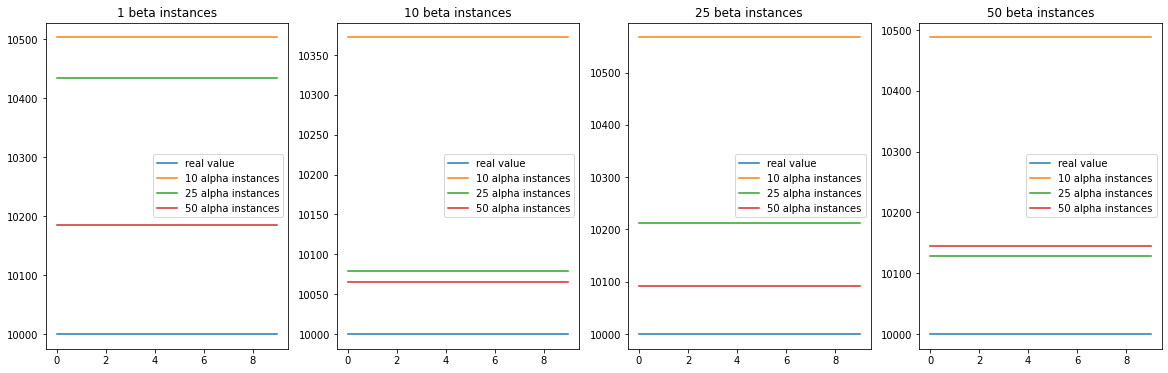

In [36]:
# Question 4

print('Accuracy')
f, ax = plt.subplots(1, 4, figsize=(20, 6))
for i, beta_instances in enumerate([1, 10, 25, 50]):
    ax[i].plot(range(10), [len(unique) for _ in range(10)], label=f'real value')
    for alpha_instances in [10, 25, 50]:
        ax[i].set_title(f'{beta_instances} beta instances')
        ax[i].plot(range(10), [np.mean(study_results[(beta_instances, alpha_instances)]) for _ in range(10)], label=f'{alpha_instances} alpha instances')
        ax[i].legend()

Normalized variance


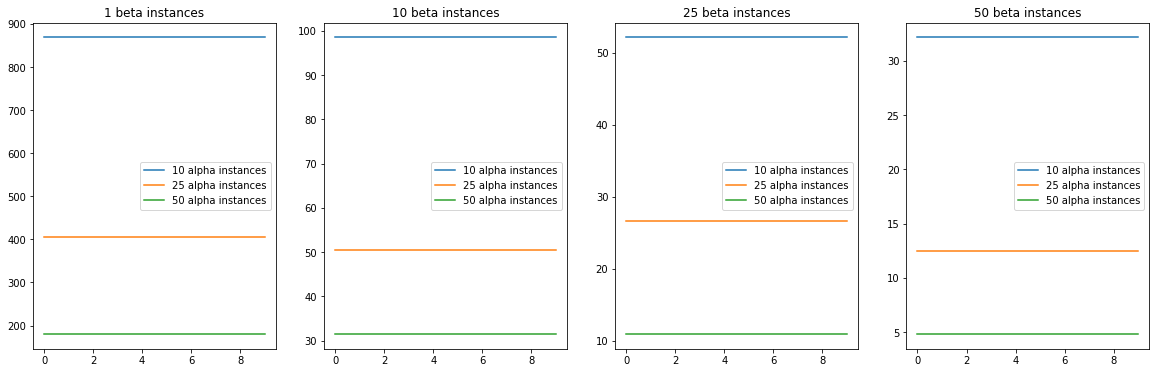

In [37]:
print('Normalized variance')
f, ax = plt.subplots(1, 4, figsize=(20, 6))
for i, beta_instances in enumerate([1, 10, 25, 50]):
    for alpha_instances in [10, 25, 50]:
        ax[i].set_title(f'{beta_instances} beta instances')
        ax[i].plot(range(10), [(np.var(study_results[(beta_instances, alpha_instances)]) / len(unique)) for _ in range(10)], label=f'{alpha_instances} alpha instances')
        ax[i].legend()

From the plots we can see that there's a consistent improvement (the result is closer to the real value) when increasing the number of alpha instances once the number of beta instances is set (except for the 50 beta instances diagram where we got a better result for 25 alphas which is of course possible but improbable and is also affected by the size of the stream and the uniques set). In other words, the bias (difference of the estimator from the real value) gets smaller as we increase the number of alpha and beta instances.

We can also see that the variance of the estimators is consistently smaller as we increase the amount of beta and alpha instances which means that the results get closer to the real value.